# Data Preprocessing

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize.toktok import ToktokTokenizer
nltk.download('stopwords')
nltk.download('punkt')

import string
import re
import emoji

from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize.toktok import ToktokTokenizer
from gensim.parsing.porter import PorterStemmer
from gensim.utils import simple_preprocess


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Inspiron5000\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Inspiron5000\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Loading Dataset
Datasets used are the ones from the LDA output and also the original dataset. These datasets are merged into one in order to get the original content of data again. 

In [2]:
df2 = pd.read_csv('topic_positive.csv')
df1 = pd.read_csv('reviews_2.csv')

In [3]:
df2

,userName,reviews,score,thumbsUpCount,reviewCreatedVersion,at,sentiment,noun,dominant_topic,confidence,dominant_topic_theme
0,Yosepa Sitokdana,mengikuti,5,0,missing,2021-12-29 14:32:57,Positive,['mengikuti'],5,0.888766,promo
1,blue Iza,fiturnya ribet barang mahal comerce,4,0,missing,2021-12-29 13:16:22,Positive,"['fiturnya', 'ribet', 'barang', 'mahal', 'come...",1,0.639520,service
2,Anto Priyanto,aplikasi mudah belanja beli,5,0,8.3.5,2021-12-29 13:07:14,Positive,"['aplikasi', 'mudah', 'belanja', 'beli']",4,0.346790,produk
3,Parodi,mantabuu,5,0,8.3.5,2021-12-29 12:16:17,Positive,['mantabuu'],0,0.000000,shopping experience
4,Edi Purnomo,beli toop,5,0,8.3.0,2021-12-29 11:45:43,Positive,"['beli', 'toop']",4,0.888818,produk
...,...,...,...,...,...,...,...,...,...,...,...
83589,Endang Franika,sesuai slogan anytime anywhere belanja istilah...,4,0,1.2,2013-12-10 10:06:41,Positive,"['sesuai', 'slogan', 'istilah', 'buka', 'rumah...",6,0.027769,aplikasi
83590,Wendy Lin,yeay muncul enak simple selamat belanja,5,1,1.2,2013-12-10 09:59:07,Positive,"['yeay', 'muncul', 'selamat', 'belanja']",6,0.470565,aplikasi
83591,Rosidi Pratama,belanja mudah apps versi pertamanya ditunggu v...,5,1,1.2,2013-12-10 09:54:03,Positive,"['belanja', 'mudah', 'apps', 'versi', 'pertama...",2,0.320059,pembayaran
83592,Christian Ozora,great experience online belanja,4,0,missing,2013-12-10 09:06:34,Positive,"['experience', 'online', 'belanja']",4,0.467379,produk


In [5]:
df3 = pd.merge(df1, df2, on=['userName', 'at'])

In [6]:
df3

,reviewId,userName,userImage,content,score_x,thumbsUpCount_x,reviewCreatedVersion_x,at,replyContent,repliedAt,reviews,score_y,thumbsUpCount_y,reviewCreatedVersion_y,sentiment,noun,dominant_topic,confidence,dominant_topic_theme
0,gp:AOqpTOH1Tfkgp_0Ov9CypCISOZ6mX2tGdJ61OWbmjKR...,Yosepa Sitokdana,https://play-lh.googleusercontent.com/a/AATXAJ...,Nanti sy ikutin DULU,5,0,NaN,2021-12-29 14:32:57,NaN,NaN,mengikuti,5,0,missing,Positive,['mengikuti'],5,0.888766,promo
1,gp:AOqpTOFj8QSrc6a2Vod2olpk5L5zcDHS0wR5M7Aw2jp...,blue Iza,https://play-lh.googleusercontent.com/a-/AOh14...,"Fiturnya agak ribet,barang nya lebih mahal dar...",4,0,NaN,2021-12-29 13:16:22,NaN,NaN,fiturnya ribet barang mahal comerce,4,0,missing,Positive,"['fiturnya', 'ribet', 'barang', 'mahal', 'come...",1,0.639520,service
2,gp:AOqpTOF7L2s63k5PLZjVoOhrbp3tubwO4BRnRtEW2d8...,Anto Priyanto,https://play-lh.googleusercontent.com/a/AATXAJ...,"aplikasi nya mantap betul, mudah ² an bisa set...",5,0,8.3.5,2021-12-29 13:07:14,NaN,NaN,aplikasi mudah belanja beli,5,0,8.3.5,Positive,"['aplikasi', 'mudah', 'belanja', 'beli']",4,0.346790,produk
3,gp:AOqpTOGzh9LnGEu0OA7f80f2QQbIkqopp-t28jqO3Lg...,Parodi,https://play-lh.googleusercontent.com/a-/AOh14...,mantabuu,5,0,8.3.5,2021-12-29 12:16:17,NaN,NaN,mantabuu,5,0,8.3.5,Positive,['mantabuu'],0,0.000000,shopping experience
4,gp:AOqpTOHhR4E-FtyP-5k-mouLHZckjVXyUaIoMlgiv95...,Edi Purnomo,https://play-lh.googleusercontent.com/a-/AOh14...,Blibli emang toop,5,0,8.3.0,2021-12-29 11:45:43,NaN,NaN,beli toop,5,0,8.3.0,Positive,"['beli', 'toop']",4,0.888818,produk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83594,gp:AOqpTOFPtLD-9nDz7OXGser-DkzEZSKcv6GFxCmq7xm...,Endang Franika,https://play-lh.googleusercontent.com/a/AATXAJ...,Sesuai dengan slogan nya..anytime anywhere sho...,4,0,1.2,2013-12-10 10:06:41,"Yeahh terima kasih sudah mau mencoba, temukan ...",2020-02-29 00:43:36,sesuai slogan anytime anywhere belanja istilah...,4,0,1.2,Positive,"['sesuai', 'slogan', 'istilah', 'buka', 'rumah...",6,0.027769,aplikasi
83595,gp:AOqpTOG7pMXoHQ0S__mQ3hjt_vViSMX9dZQWEybhCHa...,Wendy Lin,https://play-lh.googleusercontent.com/a-/AOh14...,"Yeay, akhirny mncul juga, makin gampang deh..e...",5,1,1.2,2013-12-10 09:59:07,Thank you blibli friend for good review :) hop...,2020-02-12 16:32:02,yeay muncul enak simple selamat belanja,5,1,1.2,Positive,"['yeay', 'muncul', 'selamat', 'belanja']",6,0.470565,aplikasi
83596,gp:AOqpTOHMeZAvGK5Yn62Dj2rzCXnLRckx7QCMSJ1urse...,Rosidi Pratama,https://play-lh.googleusercontent.com/a-/AOh14...,Akhirnya belanja di Bibli jadi lebih mudah kar...,5,1,1.2,2013-12-10 09:54:03,"Hai, Terima kasih atas feedback dan sarannya. ...",2020-02-16 14:21:28,belanja mudah apps versi pertamanya ditunggu v...,5,1,1.2,Positive,"['belanja', 'mudah', 'apps', 'versi', 'pertama...",2,0.320059,pembayaran
83597,gp:AOqpTOFv_arlB2tOJVi8vDF-I40nEk_izEUXFdczqke...,Christian Ozora,https://play-lh.googleusercontent.com/a-/AOh14...,Great experience online shopping :),4,0,NaN,2013-12-10 09:06:34,Thank you blibli friend for good review :) hop...,2020-02-16 14:22:04,great experience online belanja,4,0,missing,Positive,"['experience', 'online', 'belanja']",4,0.467379,produk


In [7]:
df = pd.DataFrame(df3, columns=['content', 'reviews', 'score_x', 'reviewCreatedVersion_x', 'at', 'dominant_topic_theme'])
df = df.rename(columns={'dominant_topic_theme': 'topic'})
df = df.rename(columns={'score_x': 'score'})
df = df.rename(columns={'reviewCreatedVersion_x': 'reviewCreatedVersion'})

In [10]:
df

,content,reviews,score,version,at,topic
0,Nanti sy ikutin DULU,mengikuti,5,NaN,2021-12-29 14:32:57,promo
1,"Fiturnya agak ribet,barang nya lebih mahal dar...",fiturnya ribet barang mahal comerce,4,NaN,2021-12-29 13:16:22,service
2,"aplikasi nya mantap betul, mudah ² an bisa set...",aplikasi mudah belanja beli,5,8.3.5,2021-12-29 13:07:14,produk
3,mantabuu,mantabuu,5,8.3.5,2021-12-29 12:16:17,shopping experience
4,Blibli emang toop,beli toop,5,8.3.0,2021-12-29 11:45:43,produk
...,...,...,...,...,...,...
83594,Sesuai dengan slogan nya..anytime anywhere sho...,sesuai slogan anytime anywhere belanja istilah...,4,1.2,2013-12-10 10:06:41,aplikasi
83595,"Yeay, akhirny mncul juga, makin gampang deh..e...",yeay muncul enak simple selamat belanja,5,1.2,2013-12-10 09:59:07,aplikasi
83596,Akhirnya belanja di Bibli jadi lebih mudah kar...,belanja mudah apps versi pertamanya ditunggu v...,5,1.2,2013-12-10 09:54:03,pembayaran
83597,Great experience online shopping :),great experience online belanja,4,NaN,2013-12-10 09:06:34,produk


## Data Cleaning
The data cleaning process is alsmost the same as in topic modelling, which is by:
1. Feature Selection
2. Replacing informal words to formal by using some dataset taken from Github which are called "Kamus Alay" and also replacing some letter repetition
2. Removing special characters and also emojis
3. Removing unnecessary data such as noise words and stopwords

In [11]:
stopwords_all = stopwords.words("indonesian") + stopwords.words("english")
stopwords_baru = ['sih', 'nya', 'iya', 'tah', 'ok', 'oke','bagus', 'eh', 'nya', 'jelek', 'coba', 'kecewa', 'banget', 'kayak', 'semoga', 'buruk', 'gue', 'kali', 'pas', 'mulu',
                  'sebelah', 'langsung', 'suka', 'maaf', 'sih', 'nya', 'di', 'ada', 'tempat', 'untuk', 'yang', 'ini', 'lagi', 'ya',
                  'saja', 'kok', 'deh', 'kalau', 'dan', 'kan', 'yg', 'dg', 'rt', 'dgn', 'ny', 'd', 'klo','kalo', 'amp', 'biar',
                  'bikin', 'bilang', 'gak', 'ga', 'krn', 'nya', 'nih', 'sih', 'si', 'tau', 'tdk', 'tuh', 'utk', 'ya', 'jd', 
                  'jgn', 'sdh', 'aja', 'n', 't', 'nyg', 'hehe', 'pen', 'u', 'nan', 'loh', 'rt','&amp', 'yah', 'ni', 'lg', 'tapi',
                  'bisa', 'tah', 'ya', 'sy', 'aku', 'dong', 'ud', 'dr', 'mn', 'km', 'keren', 'puas', 'sip', 'entar', 'jaya', 'mohon', 'lumayan', 'keren', 'god', 'pok', 'love', 'mntap', 'jiwa', 'okee',
                 'seng', 'okey', 'pokoknya', 'tolong', 'benaran', 'mudahan', 'bro', 'goodd', 'bosku', 'bank', 'bank', 'amin', 'gampang', 'malas', 'berat', 'mending', 'goblok', 'tol', 'mantap']
stopwords_all = stopwords_all + stopwords_baru

kamus_alay = pd.read_csv('new_kamusalay.csv', encoding="ISO-8859-1", header=None)

kamus_alay.loc[len(kamus_alay.index)] = ['onkir', 'ongkir'] 
kamus_alay.loc[len(kamus_alay.index)] = ['blanja', 'belanja'] 
kamus_alay.loc[len(kamus_alay.index)] = ['uninstal', 'uninstall'] 
kamus_alay.loc[len(kamus_alay.index)] = ['exsis', 'eksis'] 
kamus_alay.loc[len(kamus_alay.index)] = ['verivikasi', 'verifikasi'] 
kamus_alay.loc[len(kamus_alay.index)] = ['recomended', 'recommended'] 
kamus_alay.loc[len(kamus_alay.index)] = ['bajuz', 'bagus'] 
kamus_alay.loc[len(kamus_alay.index)] = ['gw', 'gue'] 
kamus_alay.loc[len(kamus_alay.index)] = ['casback', 'cashback'] 
kamus_alay.loc[len(kamus_alay.index)] = ['donlwod', 'download'] 
kamus_alay.loc[len(kamus_alay.index)] = ['donlod', 'download'] 
kamus_alay.loc[len(kamus_alay.index)] = ['mw', 'mau'] 
kamus_alay.loc[len(kamus_alay.index)] = ['chasbcak', 'cashback']
kamus_alay.loc[len(kamus_alay.index)] = ['puazzz', 'puas'] 
kamus_alay.loc[len(kamus_alay.index)] = ['puaaas', 'puas'] 
kamus_alay.loc[len(kamus_alay.index)] = ['mmbntu', 'membantu'] 
kamus_alay.loc[len(kamus_alay.index)] = ['diblibli', 'blibli'] 
kamus_alay.loc[len(kamus_alay.index)] = ['gratong', 'gratis ongkir'] 
kamus_alay.loc[len(kamus_alay.index)] = ['cust', 'customer'] 
kamus_alay.loc[len(kamus_alay.index)] = ['bibli', 'blibli']
kamus_alay.loc[len(kamus_alay.index)] = ['mncul', 'muncul']
kamus_alay.loc[len(kamus_alay.index)] = ['enag', 'enak']
kamus_alay.loc[len(kamus_alay.index)] = ['tlong', 'tolong']
kamus_alay.loc[len(kamus_alay.index)] = ['goodapp', 'good app']
kamus_alay.loc[len(kamus_alay.index)] = ['addres', 'address']
kamus_alay.loc[len(kamus_alay.index)] = ['adlh', 'adalah']
kamus_alay.loc[len(kamus_alay.index)] = ['aplikasiny', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplikasix', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplikasiyg', 'aplikasi'] 
kamus_alay.loc[len(kamus_alay.index)] = ['aplikask', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplikaso', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplilasi', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplk', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aplkasi', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['aamsung', 'samsung']
kamus_alay.loc[len(kamus_alay.index)] = ['apl', 'aplikasi']
kamus_alay.loc[len(kamus_alay.index)] = ['cant', "can't"]
kamus_alay.loc[len(kamus_alay.index)] = ['ux', 'user-experience']


indonesian_lexicon = pd.read_csv('lexicon.csv', encoding="ISO-8859-1", header=None)
indonesian_lexicon= indonesian_lexicon[[0, 1]]

frames = [kamus_alay, indonesian_lexicon]
  
kamus = pd.concat(frames)

kamus_alay_dict = {}
for i, row in kamus.iterrows():
  kamus_alay_dict[row[0]] = row[1]

In [115]:
bins = [0, 2, 5]
names = ['Negative', 'Positive']
exclist = string.digits + string.punctuation

def preprocess(s):
    s = re.sub(r'([a-z])([A-Z])', r'\1\. \2', s) 
    s = s.lower()
    s = re.sub(r'&gt|&lt', ' ', s)
    # letter repetition (if more than 2)
    s = re.sub(r'([a-z])\1{2,}', r'\1', s)
    # non-word repetition (if more than 1)
    s = re.sub(r'([\W+])\1{1,}', r'\1', s)
    # phrase repetition
    s = re.sub(r'(.{2,}?)\1{1,}', r'\1', s)
    s = ' '.join([kamus_alay_dict.get(w, w) for w in s.split()])
    
    return s.strip()

def remove_stopwords(text, is_lower_case=False):
    tokenizer = ToktokTokenizer()
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords_all]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopwords_all]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

def remove_special_characters(oldtext, remove_digits=True):
    table_ = str.maketrans(exclist, ' '*len(exclist))
    newtext = ' '.join(oldtext.translate(table_).split())
    return newtext

def give_emoji_free_text(text):
    return emoji.get_emoji_regexp().sub(r'', text)

def clean_data(df):
    filtered = pd.DataFrame(df, columns=['userName', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'at'])
    filtered["reviewCreatedVersion"].fillna("missing", inplace=True)
    filtered.dropna(inplace=True)
    filtered = filtered.reset_index()
    filtered = filtered.drop(columns=['index'])
        
    filtered['preprocessed']=filtered['content'].apply(remove_special_characters)
    filtered['preprocessed']=filtered['preprocessed'].apply(give_emoji_free_text)

    filtered = filtered.dropna()
    filtered = filtered.reset_index()
    filtered = filtered.drop(columns=['index'])
    
    for indices, row in filtered.iterrows():
        sentence = preprocess(filtered['preprocessed'][indices])
        filtered['preprocessed'][indices] = sentence
        
    filtered['sentiment'] = pd.cut(filtered['score'], bins, labels=names)
    filtered['preprocessed'] = filtered['preprocessed'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2])) 
    filtered['preprocessed'] = filtered['preprocessed'].apply(lambda x: ' '.join([w for w in x.split() if len(w)<12]))
    filtered['preprocessed'] = filtered['preprocessed'].str.lower()
    
    filtered['preprocessed'] = filtered['preprocessed'].apply(remove_stopwords)
    filtered = filtered.replace(r'^\s*$', np.NaN, regex=True)
    filtered = filtered.dropna()
    filtered['preprocessed'] = filtered['preprocessed'].str.lower()
    filtered =  filtered.reset_index()
    filtered = filtered.drop(columns=['index'])
    return filtered


df = clean_data(df)

## Data Tokenization

In [14]:
df['tokenized_text'] = [simple_preprocess(line, deacc=True) for line in df['preprocessed']] 
print(df['tokenized_text'].head(10))

0                                  [mengikuti]
1    [fiturnya, ribet, barang, mahal, comerce]
2             [aplikasi, mudah, belanja, beli]
3                                   [mantabuu]
4                                 [beli, toop]
5                                       [beli]
6                                       [beli]
7                             [cepat, respond]
8                           [mencoba, belanja]
9                       [belanja, recommended]
Name: tokenized_text, dtype: object


## Word Embedding using Pretrained Fast Text model
The pretrained model is downloaded from Fasttext's page: https://fasttext.cc/docs/en/crawl-vectors.html

FastText is a library created by the Facebook Research Team for efficient learning of word representations and sentence classification. The advantage of using Fasttext is that it is helpful to find the vector representation for rare words. Since rare words could still be broken into character n-grams, they could share these n-grams with the common words. It can also be used to give vector representations for the words not present in the dictionary, which is suitable for our review data because there are many unidentified words in it that needs to be trained. 

In [15]:
def prepare_tokenizer_and_weights(X):
    tokenizer = Tokenizer(filters='')
    tokenizer.fit_on_texts(X)
    
    weights = np.zeros((len(tokenizer.word_index)+1, 300))
    with open("cc.id.300.vec/cc.id.300.vec", encoding="utf8") as f:
        next(f)
        for l in f:
            w = l.split(' ')
            if w[0] in tokenizer.word_index:
                weights[tokenizer.word_index[w[0]]] = np.array([float(x) for x in w[1:301]])
    return tokenizer, weights

### Splitting Data
X is the values that will be used as input in the model and Y is the output. In this case, X will be the values of reviews and y is the labels that we want to predict. 

In [16]:
from sklearn.model_selection import train_test_split
X = df['preprocessed'].values
y = pd.get_dummies(df['topic']).values

In [17]:
from keras.preprocessing.text import Tokenizer
from keras.layers import Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


tokenizer, weights = prepare_tokenizer_and_weights(X)
X_seq = tokenizer.texts_to_sequences(X)
MAX_LEN = max(map(lambda x: len(x), X_seq))
X_seq = pad_sequences(X_seq, MAX_LEN)
MAX_ID = len(tokenizer.word_index)
print('MAX_LEN=', MAX_LEN)
print('MAX_ID=', MAX_ID)

MAX_LEN= 75
MAX_ID= 22438


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_seq, y) 
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(62698, 75) (62698, 8)
(20900, 75) (20900, 8)


## Building the Model
The layers used in the model: 
1. The first layer is the input layer used to instantiate the tensor model, in which the size of it is the same as the length of the word vector above. 
2. The second layer is the embedded layer that uses MAX_ID as the input dimension, output dimension being 300 from the built in FastText dimension, and weights used is from the weights of the pretrained model. 
3. The third layer is the Bidirectional LSTM used with 128 memory units. Bidirectional LSTMs are an extension of traditional LSTMs that can improve model performance on sequence classification problems. In problems where all timesteps of the input sequence are available, Bidirectional LSTMs train two instead of one LSTMs on the input sequence. The first on the input sequence as-is and the second on a reversed copy of the input sequence. This can provide additional context to the network and result in faster and even fuller learning on the problem.
4. The output layer must create 8 output values, one for each class/label that we want to predict.
5. Activation function is softmax for multi-class classification.
6. Because it is a multi-class classification problem, categorical_crossentropy is used as the loss function.

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D, InputLayer, Bidirectional, SpatialDropout1D
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

model_lstm2 = Sequential()
model_lstm2.add(InputLayer((MAX_LEN,))) 
model_lstm2.add(Embedding(input_dim=MAX_ID+1, output_dim=300, weights=[weights], trainable=True))
# model_lstm2.add(SpatialDropout1D(0.1))
model_lstm2.add(Bidirectional(LSTM(units=128)))
model_lstm2.add(Dense(8, activation='softmax'))
model_lstm2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_lstm2.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 75, 300)           6731700   
_________________________________________________________________
bidirectional_2 (Bidirection (None, 256)               439296    
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 2056      
Total params: 7,173,052
Trainable params: 7,173,052
Non-trainable params: 0
_________________________________________________________________


### Early Stopping and Modal Checkpoint
Early stopping is a method that allows you to specify an arbitrary large number of training epochs and stop training once the model performance stops improving on a hold out validation dataset .An additional callback is required that will save the best model observed during training for later use which is called the ModelCheckpoint callback. 

In [24]:
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model

metric = 'val_accuracy'

keras_callbacks   = [
      EarlyStopping(monitor='val_accuracy', patience=5, mode='max'),
      ModelCheckpoint("tc_pos_2.hdf5", monitor=metric, verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
]

history = model_lstm2.fit(X_train, y_train, validation_split=0.1, epochs=10,callbacks=[keras_callbacks])

Epoch 1/10
1764/1764 [==============================] - 431s 243ms/step - loss: 0.4229 - accuracy: 0.8557 - val_loss: 0.2456 - val_accuracy: 0.9070

Epoch 00001: val_accuracy improved from -inf to 0.90702, saving model to tc_pos_2.hdf5
Epoch 2/10
1764/1764 [==============================] - 490s 278ms/step - loss: 0.1414 - accuracy: 0.9498 - val_loss: 0.2717 - val_accuracy: 0.9027

Epoch 00002: val_accuracy did not improve from 0.90702
Epoch 3/10
1764/1764 [==============================] - 461s 262ms/step - loss: 0.0904 - accuracy: 0.9686 - val_loss: 0.2928 - val_accuracy: 0.9064

Epoch 00003: val_accuracy did not improve from 0.90702
Epoch 4/10
1764/1764 [==============================] - 517s 293ms/step - loss: 0.0654 - accuracy: 0.9765 - val_loss: 0.3286 - val_accuracy: 0.9002

Epoch 00004: val_accuracy did not improve from 0.90702
Epoch 5/10
1764/1764 [==============================] - 508s 288ms/step - loss: 0.0476 - accuracy: 0.9837 - val_loss: 0.3392 - val_accuracy: 0.9045

Epo

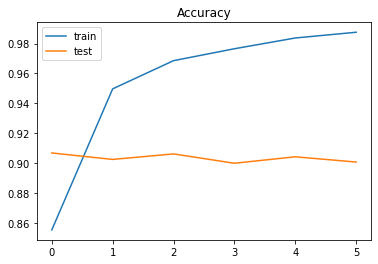

In [27]:
import matplotlib.pyplot as plt

plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

## Model Prediction
The data used in the cell below is the Test dataset which contains new reviews from December 2021 until present date. The reason we use this data to classify is because it is most recent, therefore it will be beneficial to identify. 

In [164]:
labels = ['applikasi','ongkir','pembayaran','pengiriman','produk',
          'promo', 'service','shopping experience']

In [144]:
test = pd.read_csv('test_data.csv')
bins = [0, 2, 5]
names = ['Negative', 'Positive']
test['sentiment'] = pd.cut(test['score'], bins, labels=names)

pos_df = test[test['sentiment'] == 'Positive']
pos_df = clean_data(neg_df)

x_test = pos_df['content'].values
x_test = tokenizer.texts_to_sequences(x_test)
x_test = pad_sequences(x_test, MAX_LEN)
pos_df['dominant_topic_theme'] = ""

y_pred = model_lstm2.predict(x_test)

for i, x in zip(range(len(pos_df)), y_y_pred):
    pos_df['dominant_topic_theme'][i] = labels[np.argmax(x)]

<ipython-input-144-947537b8d45c>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pos_df['dominant_topic_theme'][i] = labels[np.argmax(x)]


In [160]:
pos_df.to_csv('output_tes_pos.csv')

In [159]:
new_complaint = ['kirimnya cepat']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, MAX_LEN)
pred = model_lstm2.predict(padded)
labels = ['applikasi','ongkir','pembayaran','pengiriman','produk',
          'promo', 'service','shopping experience',]
print(pred, '\n', labels[np.argmax(pred)], np.argmax(pred))

[[1.4851206e-07 7.9941293e-03 2.5376107e-08 9.9200249e-01 5.4021971e-08
  2.3748812e-06 2.2934685e-07 5.3920189e-07]] 
 pengiriman 3


# Data Visualization on Output

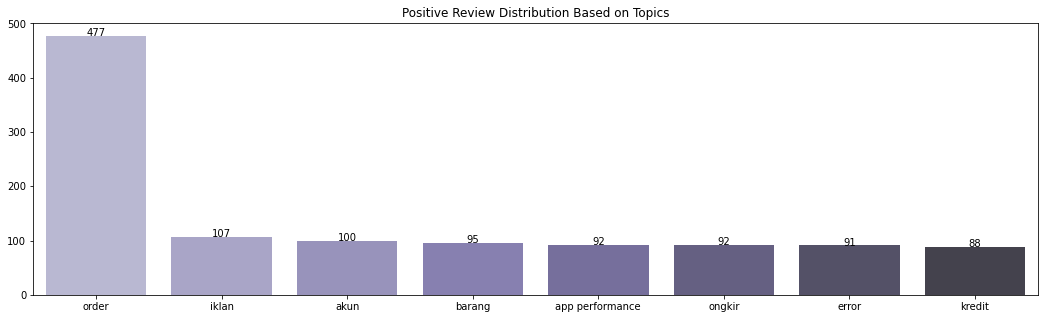

In [163]:
def show_values_on_bars(ax, h_v, space):
    if h_v == "v":
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = int(p.get_height())
            ax.text(_x, _y, value, ha="center") 
    elif h_v == "h":
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height()
            value = int(p.get_width())
            ax.text(_x, _y, value, ha="left")

data_2021 = pos_df
ratings = data_2021['dominant_topic_theme'].value_counts()
name = ratings.index.tolist()
amount = ratings.values.tolist()

plt.figure(1 , figsize = (18, 5))
ax = sns.barplot(x = name, y = amount, palette="Purples_d")
show_values_on_bars(ax, "v", 10)
ax.set_title('Positive Review Distribution Based on Topics')
plt.show()